In [1]:
import pandas as pd
import numpy as np

In [2]:
decks_df = pd.read_csv("https://raw.githubusercontent.com/amcclead7336/MTG_GameData/main/Decks.csv")
gd_df = pd.read_csv("https://raw.githubusercontent.com/amcclead7336/MTG_GameData/main/GameData.csv")
display(decks_df.head())
gd_df.head()

,ID,Deck Title,Commander,Ratings 2022-11-20,White,Blue,Black,Red,Green,Notes
0,0,Painbow,Jared Carthalion,4.0,1,1,1,1,1,NaN
1,1,Legends' Legacy,"Dihada, Binder of Wills",5.0,1,0,1,1,0,NaN
2,2,Planar Portal,"Prosper, Tome-Bound",3.0,0,0,1,1,0,NaN
3,3,Aura of Courage,"Galea, Kindler of Hope",4.0,1,1,0,0,1,NaN
4,4,Dungeons of Death,Sefris of the Hidden Ways,2.0,1,1,1,0,0,NaN


,Date,P0Deck,P1Deck,P0EndLife,P1EndLife,P0Time,P1Time,TotalTime,P0TotalCards,P1TotalCards,P0Win,P1Win,P0,P1
0,2022-11-23,13,14,-4,39,0:09:29,0:14:42,0:24:11,11,14,0,1,0,1
1,2022-11-23,13,15,-1,12,0:20:11,0:23:00,0:43:11,13,25,0,1,0,1
2,2022-11-23,15,13,7,-3,0:18:17,0:37:51,0:56:08,22,33,1,0,0,1
3,2022-12-26,6,3,-3,28,0:06:14,0:11:36,0:17:50,11,17,0,1,0,1
4,2022-12-26,6,16,-4,36,0:05:33,0:10:54,0:16:27,8,10,0,1,0,1


In [3]:
gd_w_deck = gd_df.merge(decks_df, left_on="P0Deck", right_on="ID")
gd_w_deck = gd_w_deck.merge(decks_df,left_on="P1Deck", right_on="ID")

p0Decks = gd_w_deck['Deck Title_x'].value_counts()
p1Decks = gd_w_deck['Deck Title_y'].value_counts()
for pdeck in [p0Decks, p1Decks]:
    for deck in decks_df['Deck Title']:
        if deck not in pdeck.index:
            pdeck[deck] = 0

p0Decks = p0Decks.sort_index()
p1Decks = p1Decks.sort_index()

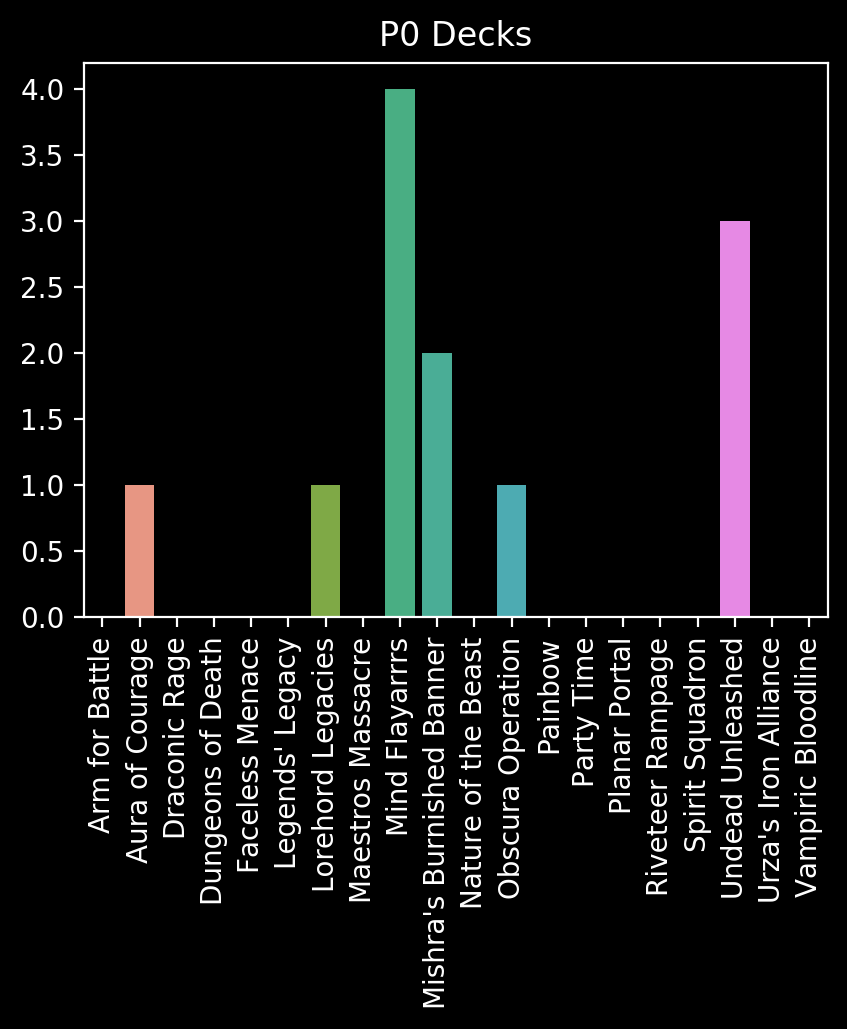

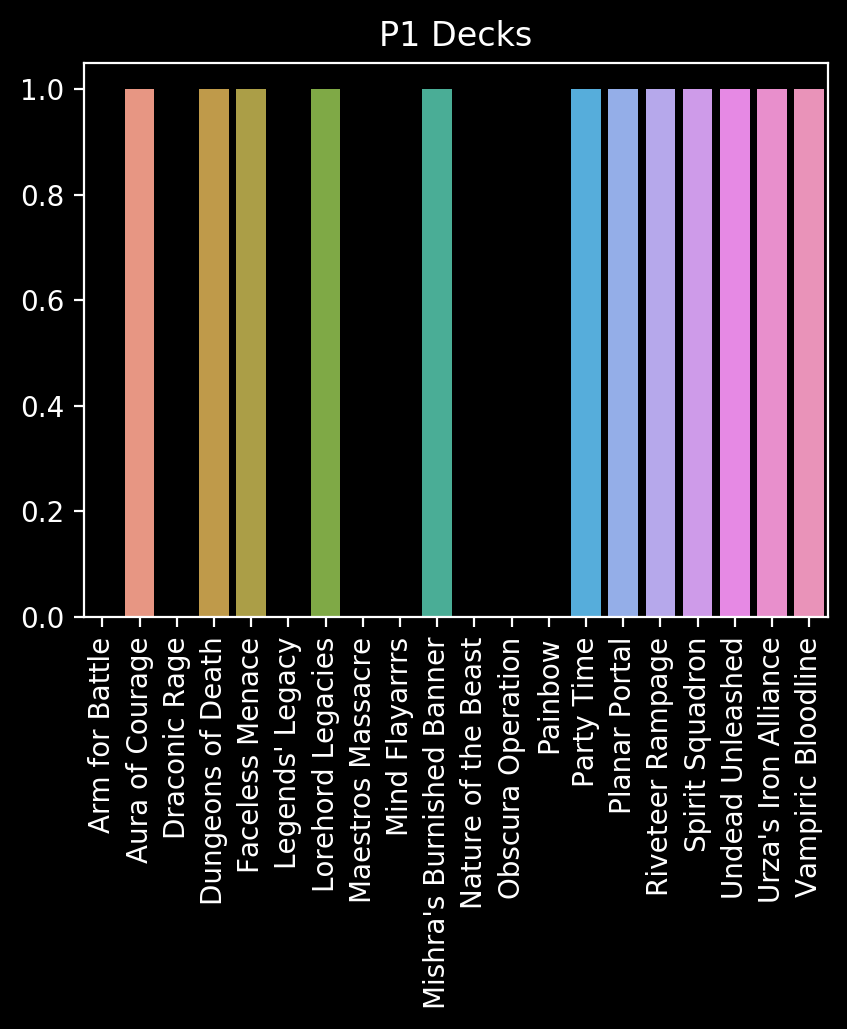

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=p0Decks.index,y=p0Decks.values)
plt.title("P0 Decks")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x=p1Decks.index,y=p1Decks.values)
plt.title("P1 Decks")
plt.xticks(rotation=90)
plt.show()